# 用线性回归预测沃尔玛未来销售情况

## 分析目标

此数据分析报告的目的是，基于已有沃尔玛门店的每周销售额，以及有关该门店的其他周边数据，进行线性回归分析，从而想利用得到的线性回归模型能对未来时间销售额进行预测。

## 简介

数据集`walmart_stores_data.csv`记录了沃尔玛全国范围内多家零售门店超过六千条销售数据，以及门店销售相关影响因素包括：是否为假日周、销售日温度、该地区燃油成本、消费者物价指数、失业率等等。

`walmart_stores_data.csv`每列含义如下：

- Store：店铺编号
- Date：销售周
- Weekly_Sales：店铺在该周的销售额
- Holiday_Flag：是否为假日周
   - 0 否
   - 1 是
- Temperature：销售日的温度
- Fuel_Price：该地区的燃油成本
- CPI（消费者物价指数）：消费者物价指数
- Unemployment：失业率

## 读取数据

导入数据分析所需要的库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

导入数据分析所需要的库，并通过Pandas的`read_csv`函数，将原始数据文件"walmart_stores_data.csv"里的数据内容，解析为DataFrame并赋值给变量`original_data`。

In [2]:
original_data = pd.read_csv('walmart_stores_data.csv')
original_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## 评估和清理数据

在这一部分中，我们将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。
为了区分开经过清理的数据和原始的数据，我们创建新的变量`cleaned_data`，让它为`original_data`复制出的副本。我们之后的清理步骤都将被运用在`cleaned_data`上。

In [3]:
cleaned_data = original_data.copy()

### 数据整齐度

In [4]:
cleaned_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


从头部的10行数据来看，数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

接下来通过`info`，对数据内容进行大致了解。

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


从输出结果看，`cleaned_data`共有6435条观察值，变量不存在缺失值。

数据类型方面，我们已知`Store`（不同门店）、`Holiday_Flag`（是否为假日周）都是分类数据，可以把数据类型都转换为Category。

In [6]:
cleaned_data['Store'] = cleaned_data['Store'].astype("category")
cleaned_data['Holiday_Flag'] = cleaned_data['Holiday_Flag'].astype("category")

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Store         6435 non-null   category
 1   Date          6435 non-null   object  
 2   Weekly_Sales  6435 non-null   float64 
 3   Holiday_Flag  6435 non-null   category
 4   Temperature   6435 non-null   float64 
 5   Fuel_Price    6435 non-null   float64 
 6   CPI           6435 non-null   float64 
 7   Unemployment  6435 non-null   float64 
dtypes: category(2), float64(5), object(1)
memory usage: 315.9+ KB


#### 处理缺失数据

从`info`方法的输出结果来看，`cleaned_data`不存在缺失值，因此不需要对缺失数据进行处理。

#### 处理重复数据

根据数据变量的含义以及内容来看，每一条观察值代表不同时间段下由多种因素影响销售额，因此不能存在重复数据。

In [8]:
cleaned_data[cleaned_data.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


从输出结果来看，该数据集不存在重复数据。

#### 处理不一致数据

不一致数据可能存在于`Holiday_Flag`分类变量中，`0`代表不是假日周，`1`代表是假日周，因此需要检查是否有其他分类。

In [9]:
cleaned_data['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

从输出结果来看，不存在不一致数据。

#### 处理无效或错误数据

可以通过DataFrame的`describe`方法，对数值统计信息进行快速了解。

In [10]:
cleaned_data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,100.140000,4.468000,227.232807,14.313000


从以上统计数据来看，`cleaned_data`不存在脱离现实意义的数值。

## 探索数据

在着手推断统计学分析之前，我们可以先借助数据可视化，探索数值变量的分布，以及与销售额存在相关性的变量，为后续的进一步分析提供方向。

In [11]:
# 设置图表色盘为"pastel"
sns.set_palette('pastel')

### 销售额分布

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


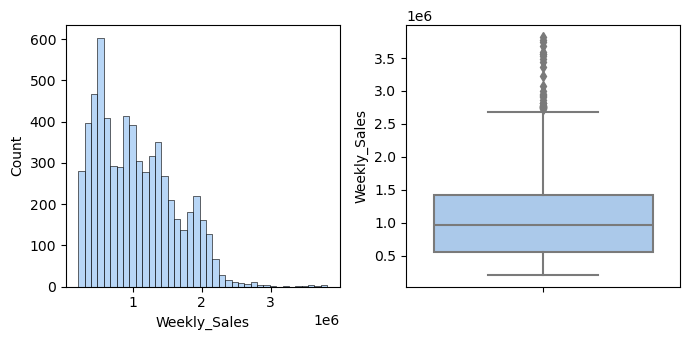

In [12]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x='Weekly_Sales', ax=axes[0])
sns.boxplot(cleaned_data, y='Weekly_Sales', ax=axes[1])
plt.show()

销售额呈右偏态分布，说明数据集中的大多数沃尔玛门店销售额中等，但有一些价格很高的极端值，使得均值被拉高。

### 门店每周平均销售额

C:\Users\29068\AppData\Local\Temp\ipykernel_12948\3434090984.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sales = cleaned_data.groupby("Store")["Weekly_Sales"].mean()


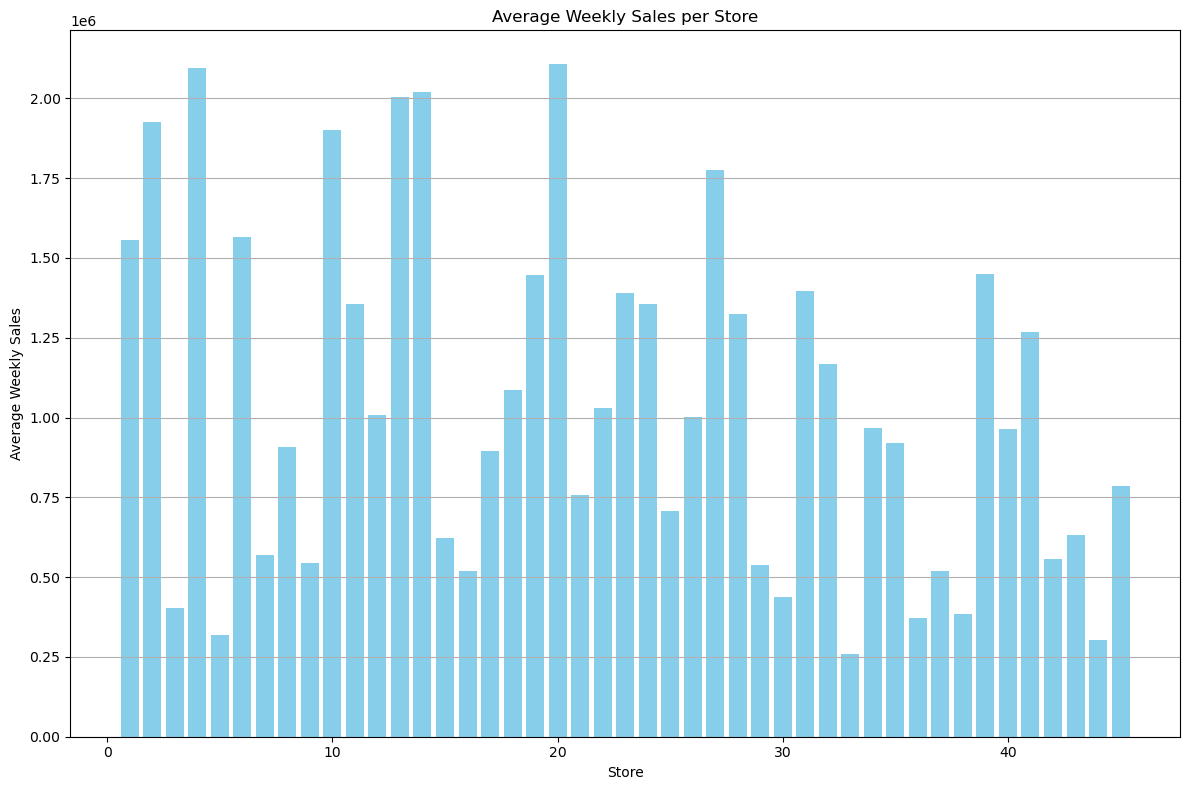

In [13]:
average_sales = cleaned_data.groupby("Store")["Weekly_Sales"].mean()
plt.figure(figsize=(12, 8))
plt.bar(average_sales.index, average_sales.values, color='skyblue')
plt.title('Average Weekly Sales per Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.grid(axis='y')
plt.show()

### 门店销售额与是否为假日周之间的关系

C:\Users\29068\AppData\Local\Temp\ipykernel_12948\2241785206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Holiday_sales = cleaned_data.groupby("Holiday_Flag")["Weekly_Sales"].mean()


<Axes: xlabel='Weekly_Sales'>

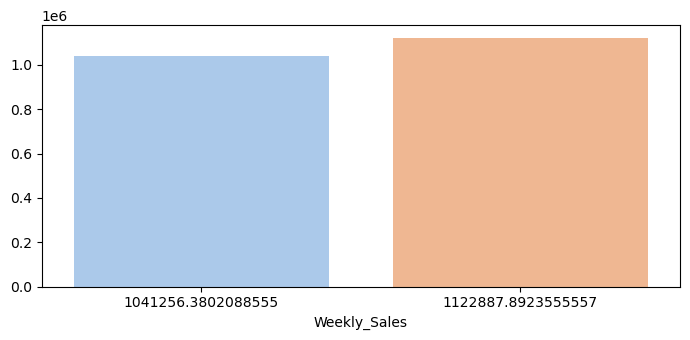

In [14]:
Holiday_sales = cleaned_data.groupby("Holiday_Flag")["Weekly_Sales"].mean()
sns.barplot(Holiday_sales,x=Holiday_sales.index,y=Holiday_sales.values)

从输出结果看，假日周门店平均销售额比非假日周要多。

### 各个变量之间的关系

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

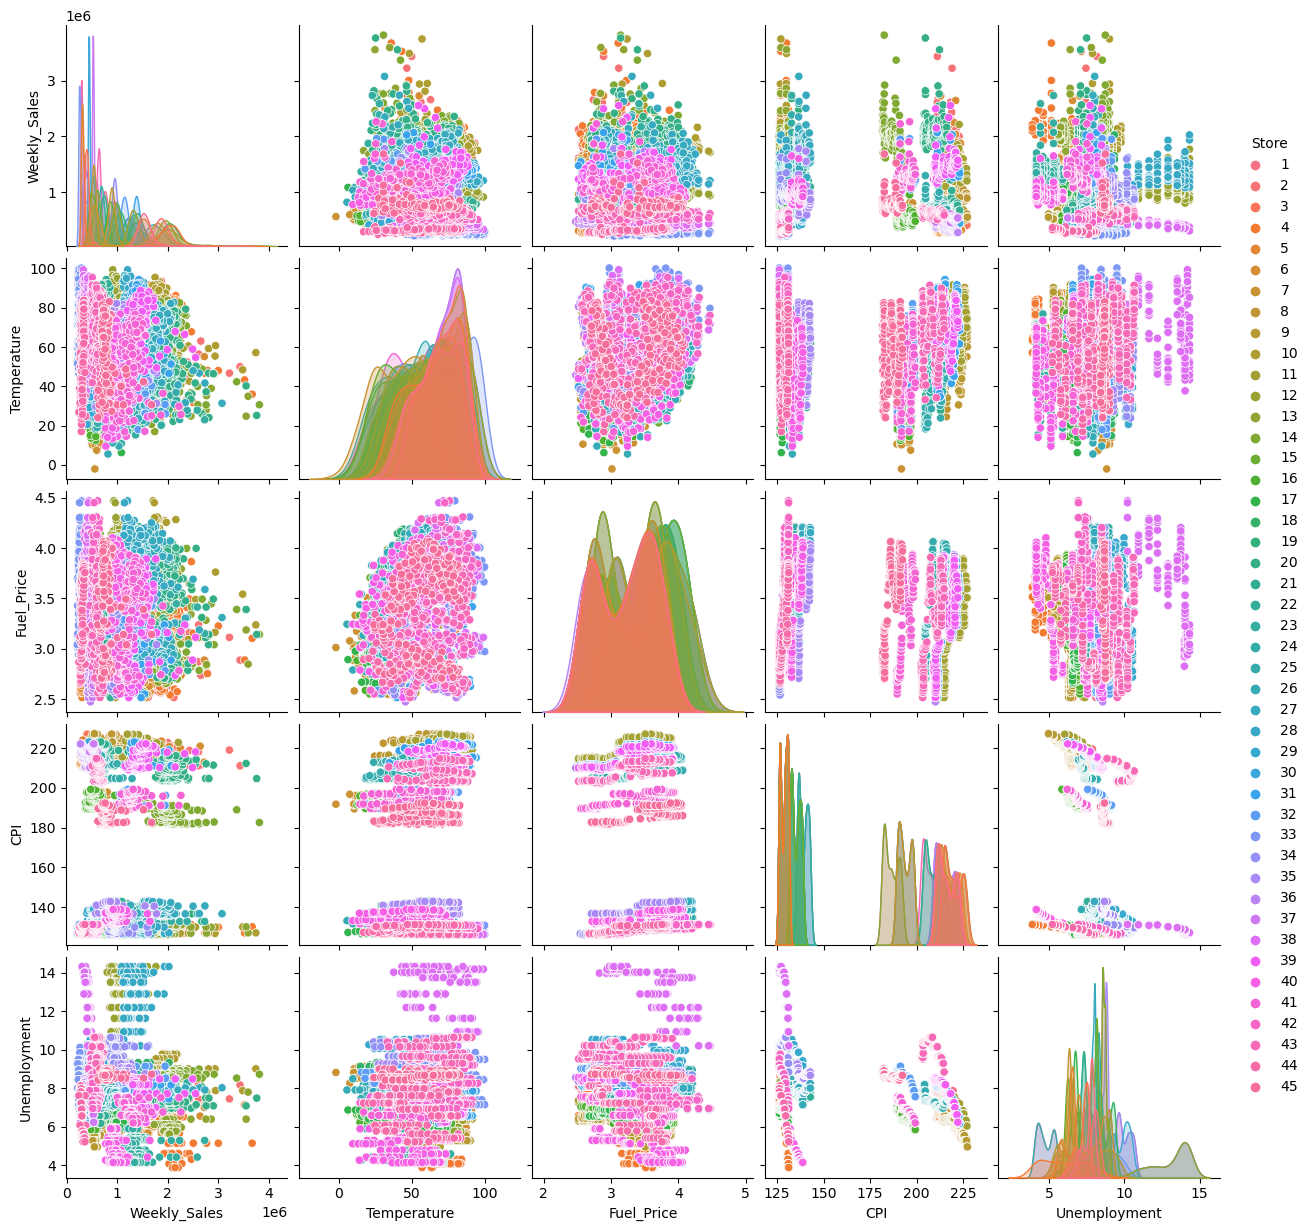

In [15]:
sns.pairplot(cleaned_data,hue = "Store")

从散点图能看出很少有哪两种变量之间存在明显的线性关系，但由于门店较多，因此我们仍需抽取其中一个或多个门店数据查看`Temperature`,`Fuel_Price`,`CPI`,`Unemployment`是否与`Weekly_Sales`之间存在线性关系。

以下是抽取门店1的销售相关数据进行分析。

<Axes: xlabel='Unemployment', ylabel='Weekly_Sales'>

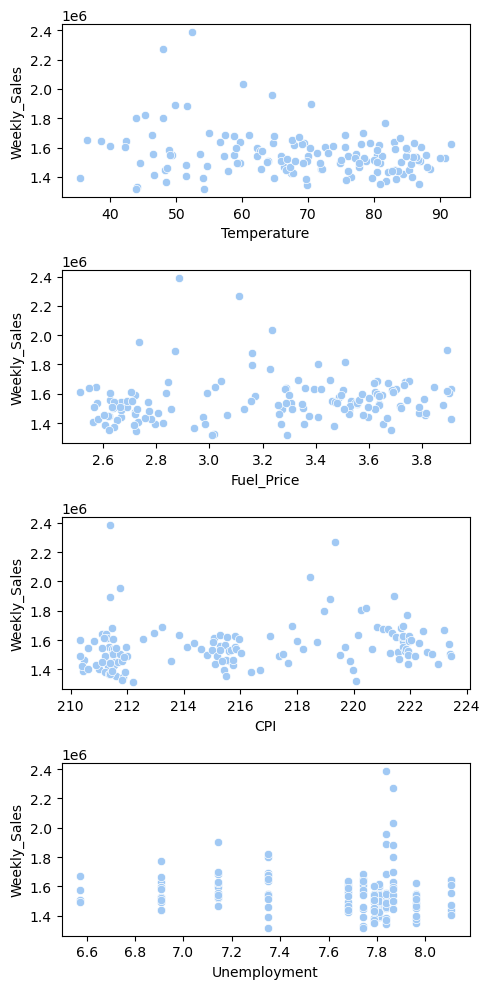

In [16]:
figure, axes = plt.subplots(4, 1, figsize=(5, 10))
store_1_data = cleaned_data[cleaned_data['Store'] == 1]
sns.scatterplot(store_1_data,x = 'Temperature',y='Weekly_Sales',ax=axes[0])
sns.scatterplot(store_1_data,x = 'Fuel_Price',y='Weekly_Sales',ax=axes[1])
sns.scatterplot(store_1_data,x = 'CPI',y='Weekly_Sales',ax=axes[2])
sns.scatterplot(store_1_data,x = 'Unemployment',y='Weekly_Sales',ax=axes[3])

从以上输出结果来看，几种变量与销售额之间并没有明显的线性关系。

## 分析数据

在分析步骤中，我们将利用`cleaned_data`的数据，进行线性回归分析，目标是得到一个可以根据房屋各个属性对价格进行预测的数学模型。

我们先引入做线性回归所需的模块。

In [17]:
import statsmodels.api as sm

然后可以创建一个新的DataFrame`lr_cleaned_data`，让它作为我们进行线性回归分析所用的数据。

和`cleaned_data`区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在`lr_cleaned_data`上执行。

In [18]:
lr_cleaned_data = cleaned_data.copy()

由于数据里存在分类变量，无法直接建立线性回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该分类。

In [19]:
lr_cleaned_data = pd.get_dummies(lr_cleaned_data,drop_first = True,columns=['Holiday_Flag'],dtype=int)
lr_cleaned_data

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1
0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,0
1,1,12-02-2010,1641957.44,38.51,2.548,211.242170,8.106,1
2,1,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106,0
3,1,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106,0
4,1,05-03-2010,1554806.68,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,64.88,3.997,192.013558,8.684,0
6431,45,05-10-2012,733455.07,64.89,3.985,192.170412,8.667,0
6432,45,12-10-2012,734464.36,54.47,4.000,192.327265,8.667,0
6433,45,19-10-2012,718125.53,56.47,3.969,192.330854,8.667,0


接下来，我们要把因变量和自变量划分出来。

因变量是`Weekly_Sales`变量，因为我们进行线性回归的目的，是得到一个能根据其它可能对房屋价格有影响的变量，来预测销售价格的模型。

In [20]:
y = lr_cleaned_data['Weekly_Sales']

我们可以把除价格之外的都纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [21]:
X = lr_cleaned_data.drop(['Weekly_Sales','Store','Date'],axis=1)
X

,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1
0,42.31,2.572,211.096358,8.106,0
1,38.51,2.548,211.242170,8.106,1
2,39.93,2.514,211.289143,8.106,0
3,46.63,2.561,211.319643,8.106,0
4,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...
6430,64.88,3.997,192.013558,8.684,0
6431,64.89,3.985,192.170412,8.667,0
6432,54.47,4.000,192.327265,8.667,0
6433,56.47,3.969,192.330854,8.667,0


一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [22]:
X.corr().abs() > 0.8

,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1
Temperature,True,False,False,False,False
Fuel_Price,False,True,False,False,False
CPI,False,False,True,False,False
Unemployment,False,False,False,True,False
Holiday_Flag_1,False,False,False,False,True


从以上输出来看，不同变量之间相关系数的绝对值均小于或等于0.8。

接下来，给模型的线性方程添加截距。

In [23]:
X = sm.add_constant(X)
X

,const,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1
0,1.0,42.31,2.572,211.096358,8.106,0
1,1.0,38.51,2.548,211.242170,8.106,1
2,1.0,39.93,2.514,211.289143,8.106,0
3,1.0,46.63,2.561,211.319643,8.106,0
4,1.0,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...
6430,1.0,64.88,3.997,192.013558,8.684,0
6431,1.0,64.89,3.985,192.170412,8.667,0
6432,1.0,54.47,4.000,192.327265,8.667,0
6433,1.0,56.47,3.969,192.330854,8.667,0


下一步就可以调用OLS函数，利用最小二乘法来得到线性回归模型的参数值。

In [24]:
model = sm.OLS(y,X).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           5.93e-34
Time:                        17:46:09   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.727e+06   7.98e+04     21.646      0.000    1.57e+06    1.88e+06
Temperature     -724.1715    400.461     -1.808      0.071   -1509.207      60.864
Fuel_Price     -1.017e+04   1.58e+04     -0.645      0.519   -4.11e+04    2.07e+04
CPI            -1598.8717    195.127     -8.194      0.000   -1981.385   -1216.358
Unemployment   -4.155e+04   3972.660    -10.460      0.000   -4.93e+04   -3.38e+04
Holiday_Flag_1  7.489e+04   2.76e+04      2.710      0.007    2.07e+04    1.29e+05
==============================================================================
Omnibus:                      365.109   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.212
Skew:                           0.633   Prob(JB):                     3.81e-94
Kurtosis:                       3.007   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为油价对销售额没有影响。此外，常数（表示线性方程的截距）的P值也很大，说明也没有显著影响。

可以把这些变量移除后，再次建立线性回归模型。

此外，注意到R方值接近于零，即模型对现有数据拟合度过低，可能不存在多元线性相关性，可一出变量后在进行观察。

In [26]:
X = X.drop(['Fuel_Price'],axis = 1)

In [27]:
model = sm.OLS(y,X).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     41.86
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.05e-34
Time:                        17:46:09   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.885e+05
Df Residuals:                    6430   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.688e+06   5.25e+04     32.139      0.000    1.58e+06    1.79e+06
Temperature     -773.1474    393.179     -1.966      0.049   -1543.910      -2.385
CPI            -1570.0053    189.917     -8.267      0.000   -1942.307   -1197.704
Unemployment   -4.124e+04   3942.040    -10.460      0.000    -4.9e+04   -3.35e+04
Holiday_Flag_1  7.576e+04   2.76e+04      2.744      0.006    2.16e+04     1.3e+05
==============================================================================
Omnibus:                      366.390   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.961
Skew:                           0.635   Prob(JB):                     1.59e-94
Kurtosis:                       3.009   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

可以看到，当我们把P值较大的自变量从线性回归模型中移除后，R方值并没有发生变化，一方面模型对现有数据的拟合度并不高，另一方面也能说明该数据集的销售额与这些变量之间不具备线性关系，需要重新对数据进行分析寻找更好的拟合模型。但由于本人能力不足，只能止步于此，因由交予他人，望能寻找这些变量之间更好的拟合模型。